# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
testing_file  = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy

### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_test.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
y_unique, counts = numpy.unique(y_train, return_counts=True)
n_classes = y_unique.shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

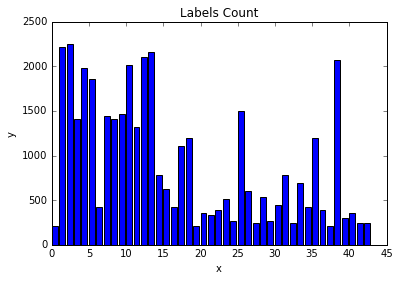

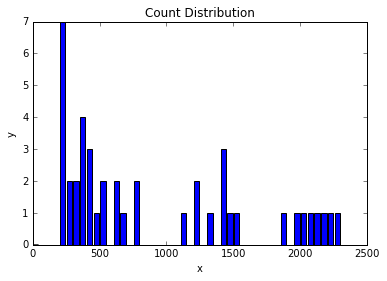

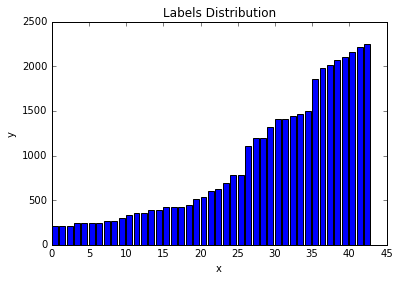

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure(1)
plt.bar(y_unique, counts)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Labels Count')

plt.figure(2)
bins = [x*50 for x in range(0, 50)]
plt.hist(counts, bins, histtype='bar', rwidth=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Count Distribution')

plt.figure(3)
plt.bar(y_unique, numpy.sort(counts))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Labels Distribution')

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
# the label that has less than 1000 samples and the difference to 1000



In [5]:
np = numpy

### Preprocess the data here.

### Feel free to use as many code cells as needed.

# grayscale it
# linear map all data points to [-1, 1]
print(type(X_train), X_train.shape)

def linear_map(data):
    return np.interp(data, [0, 256], [-1, 1])

def softmaxize(data):
    ret = np.zeros((data.shape[0], 43))
    for i, datum in enumerate(data):
        probabilities = np.zeros(43)
        probabilities[datum] = 1
        ret[i] = probabilities
    return ret

def randomize_with_sample_order(samples, labels):
    assert len(samples) == len(labels)
    permu = np.random.permutation(len(labels))
    return samples[permu], labels[permu]

X_train_processed = linear_map(X_train)
print(type(X_train_processed), X_train_processed.shape, np.max(X_train_processed), np.min(X_train_processed))

X_test_processed = linear_map(X_test)

# format y to softmax format
# we know that y is from 0 to 42
y_train_processed = softmaxize(y_train)
y_test_processed = softmaxize(y_test)

X_train_processed, y_train_processed = randomize_with_sample_order(X_train_processed, y_train_processed)
X_test_processed, y_test_processed = randomize_with_sample_order(X_test_processed, y_test_processed)


<class 'numpy.ndarray'> (39209, 32, 32, 3)
<class 'numpy.ndarray'> (39209, 32, 32, 3) 0.9921875 -1.0


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**  
Grayscaling an image does not loose too much information and also downsizes the input to 1/3 so that a single machine can train bigger batch at once.

linear mapping input range from [0, 256] to [-1, 1] does not loose any information (if not taking floating point precision in count), but, makes the input more dense and suitable for gradient descent algorithm to work properly.

Center the data at 0 also makes gradient descent work better.

{0: 790, 6: 580, 14: 220, 15: 370, 16: 580, 19: 790, 20: 640, 21: 670, 22: 610, 23: 490, 24: 730, 26: 400, 27: 760, 28: 460, 29: 730, 30: 550, 31: 220, 32: 760, 33: 311, 34: 580, 36: 610, 37: 790, 39: 700, 40: 640, 41: 760, 42: 760}
15501
{0: 0, 6: 0, 14: 0, 15: 0, 16: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 36: 0, 37: 0, 39: 0, 40: 0, 41: 0, 42: 0} 15501


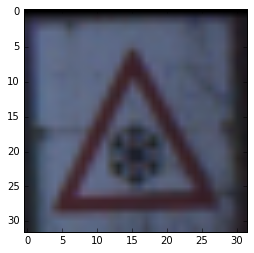

In [14]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

less_than_1000 = {i: 1000 - count for i, count in enumerate(counts) if count < 1000}
print(less_than_1000)

new_train_samples = np.zeros([sum(less_than_1000.values()), 32, 32, 3])
new_train_labels  = np.zeros([sum(less_than_1000.values()), 43]) 
new_index = 0
print(sum(less_than_1000.values()))

while sum(less_than_1000.values()) > 0:
    for sample, label_softmax in zip(X_train_processed, y_train_processed):
        label = np.argmax(label_softmax)
        if label in less_than_1000 and less_than_1000[label] > 0:
            new_train_samples[new_index][1:] = sample[0:31]
            new_train_labels[new_index] = label_softmax
            new_index += 1
            less_than_1000[label] -= 1
print(less_than_1000, new_index)

X_train_processed = np.concatenate((X_train_processed, new_train_samples), axis=0)
y_train_processed = np.concatenate((y_train_processed, new_train_labels), axis=0)

plt.imshow(new_train_samples[100])

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

def MiniNet(dataflow, para, isTrain):
    '''
    dataflow: expect a tensor/ndarray with shape N 32 32 1
    para: a dictionary that holds all parameters for the network
    '''
    #conv1
    dataflow = tf.nn.conv2d(dataflow, filter=para['conv1_w'], strides=[1, 1, 1, 1], padding='SAME', name='conv1')
    dataflow = tf.nn.relu(dataflow + para['conv1_b'])
    
    #conv2
    dataflow = tf.nn.conv2d(dataflow, filter=para['conv2_w'], strides=[1, 1, 1, 1], padding='SAME', name='conv2')
    dataflow = tf.nn.relu(dataflow + para['conv2_b'])
    dataflow = tf.nn.max_pool(dataflow, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    #conv3
    dataflow = tf.nn.conv2d(dataflow, filter=para['conv3_w'], strides=[1, 1, 1, 1], padding='SAME', name='conv3')
    dataflow = tf.nn.relu(dataflow + para['conv3_b'])
        
    #conv4
    dataflow = tf.nn.conv2d(dataflow, filter=para['conv4_w'], strides=[1, 1, 1, 1], padding='SAME', name='conv4')
    dataflow = tf.nn.relu(dataflow + para['conv4_b'])
    dataflow = tf.nn.max_pool(dataflow, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # reshape
    shape = dataflow.get_shape().as_list()
    dataflow = tf.reshape(dataflow, [shape[0], shape[1] * shape[2] * shape[3]])
    
    # fc1
    dataflow = tf.matmul(dataflow, para['fc1_w'])
    dataflow = tf.nn.relu(dataflow + para['fc1_b'])
    
    dataflow = tf.matmul(dataflow, para['fc2_w'])
    dataflow = tf.nn.relu(dataflow + para['fc2_b'])
    
    # dropout
    if isTrain:
        dataflow = tf.nn.dropout(dataflow, 0.9, seed=4926)
    
    # fc2
    return tf.matmul(dataflow, para['fc3_w']) + para['fc3_b']

    
def train(samples, labels, parameters):
    logits = MiniNet(samples, parameters, isTrain=True)
    
    # Loss
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, labels))
    regularization = tf.nn.l2_loss(parameters['fc1_w']) + tf.nn.l2_loss(parameters['fc1_b']) \
                   + tf.nn.l2_loss(parameters['fc2_w']) + tf.nn.l2_loss(parameters['fc2_b'])
    loss += 5e-4 * regularization

    # learning rate decay
    global_step = tf.Variable(0)
    lr = 0.001
    dr = 0.99
    learning_rate = tf.train.exponential_decay(lr, global_step*64, 100, dr, staircase=True)

    # Optimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate) \
        .minimize(loss, global_step=global_step)
        
    #optimizer = tf.train.AdadeltaOptimizer(learning_rate=0.001, rho=0.95, epsilon=1e-08) \
    #    .minimize(loss, global_step=global_step)
    
    # Prediction
    prediction = tf.nn.softmax(logits)
    
    return loss, optimizer, prediction

def test(samples, parameters):
    logits = MiniNet(samples, parameters, isTrain=False)
    return tf.nn.softmax(logits)


def initialize_parameters():
    para = {}
    # shape: patch_size, patch_size, in_depth, out_depth
    para['conv1_w'] = tf.Variable(tf.truncated_normal([5, 5, 3, 64], stddev=0.1))
    para['conv1_b'] = tf.Variable(tf.constant(0.1, shape=[64]))
    
    para['conv2_w'] = tf.Variable(tf.truncated_normal([5, 5, 64, 64], stddev=0.1))
    para['conv2_b'] = tf.Variable(tf.constant(0.1, shape=[64]))
    
    para['conv3_w'] = tf.Variable(tf.truncated_normal([5, 5, 64, 64], stddev=0.1))
    para['conv3_b'] = tf.Variable(tf.constant(0.1, shape=[64]))
    
    para['conv4_w'] = tf.Variable(tf.truncated_normal([5, 5, 64, 64], stddev=0.1))
    para['conv4_b'] = tf.Variable(tf.constant(0.1, shape=[64]))
    
    # 32 * 32: the size of original image
    # // 4 // 4: 2 times of maxpooling of downsizing 0.5 in Width and Height of the original image
    in_num_nodes = 32 * 32 // 4 // 4 * 64
    
    # shape: in_num_nodes, out_num_nodes
    para['fc1_w'] = tf.Variable(tf.truncated_normal([in_num_nodes, 512], stddev=0.1))
    para['fc1_b'] = tf.Variable(tf.constant(0.1, shape=[512]))
    
    para['fc2_w'] = tf.Variable(tf.truncated_normal([512, 128], stddev=0.1))
    para['fc2_b'] = tf.Variable(tf.constant(0.1, shape=[128]))
    
    para['fc3_w'] = tf.Variable(tf.truncated_normal([128, 43], stddev=0.1))
    para['fc3_b'] = tf.Variable(tf.constant(0.1, shape=[43]))
    return para
    


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**  
4 layers of convolution:

    [3, 3, 1, 64], SAME PADDING
    [3, 3, 64, 64], SAME PADDING
    MAX POOLING: [1, 2, 2, 1]

    [3, 3, 64, 64], SAME PADDING
    [3, 3, 64, 64], SAME PADDING
    MAX POOLING: [1, 2, 2, 1]

2 layers of fully connected:

    [64, 128]
    [128, 43]
    
Relu is the only activation function.  
Dropout is applied after first fully connected layer during training.

Loss: cross entropy loss + l2  
Update function: Adagrad  
Optimization: exponential learning rate decay is applied.

In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.

parameters = initialize_parameters()

batch_size = 64
steps = 1000

train_samples = tf.placeholder(tf.float32, shape=(batch_size, 32, 32, 3))
train_labels  = tf.placeholder(tf.float32, shape=(batch_size, 43))
loss, optimizer, train_prediction = train(train_samples, train_labels, parameters)

test_samples = tf.placeholder(tf.float32, shape=(1000, 32, 32, 3))
test_prediction = test(test_samples, parameters)

def accuracy(spredictions, labels):
    _predictions = np.argmax(predictions, 1)
    _labels = np.argmax(labels, 1)
    return (100.0 * np.sum(_predictions == _labels) / predictions.shape[0])

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for step in range(steps):
        offset = (step * batch_size) % (y_train_processed.shape[0] - batch_size)
        batch_data = X_train_processed[offset:(offset + batch_size), :, :, :]
        batch_labels = y_train_processed[offset:(offset + batch_size), :]
        feed_dict = {
            train_samples: batch_data,
            train_labels:  batch_labels
        }
        _, l, predictions = sess.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        
        accu  = accuracy(predictions, batch_labels)

        if (step % 50 == 0):
            print('Minibatch loss at step %d: %f' % (step, l))
            print('Minibatch accuracy: %.1f%%' % accu)

Minibatch loss at step 0: 84.785507
Minibatch accuracy: 4.7%
Minibatch loss at step 50: 7.450654
Minibatch accuracy: 7.8%
Minibatch loss at step 100: 6.586074
Minibatch accuracy: 15.6%
Minibatch loss at step 150: 6.559741
Minibatch accuracy: 21.9%
Minibatch loss at step 200: 5.469334
Minibatch accuracy: 43.8%
Minibatch loss at step 250: 5.775237
Minibatch accuracy: 34.4%
Minibatch loss at step 300: 5.779118
Minibatch accuracy: 29.7%
Minibatch loss at step 350: 5.323931
Minibatch accuracy: 43.8%
Minibatch loss at step 400: 4.863948
Minibatch accuracy: 59.4%
Minibatch loss at step 450: 4.731441
Minibatch accuracy: 62.5%
Minibatch loss at step 500: 5.451707
Minibatch accuracy: 42.2%
Minibatch loss at step 550: 4.820476
Minibatch accuracy: 60.9%
Minibatch loss at step 600: 4.899937
Minibatch accuracy: 54.7%
Minibatch loss at step 650: 5.850392
Minibatch accuracy: 37.5%
Minibatch loss at step 700: 5.798892
Minibatch accuracy: 37.5%
Minibatch loss at step 750: 5.616089
Minibatch accuracy: 35

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [9]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [10]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [11]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.